<a href="https://colab.research.google.com/github/yje0515/PythonStudy2025/blob/main/03_03_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

# 대방어 데이터 56개
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
# 사이킷런을 이용해서 훈련세트와 테스트 세트를 나눔.

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

# 2차원 배열로 만들어야 함
# -1 지정하면 원소 개수로 모두채우라는 의미 , 1은 두번 째 크기를 1로(특성)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [4]:
# 선형회귀(linear:리니어) 비교적 간단하고 성능이 뛰어남
# 선형이라는 말에서 짐작할 수 있듯이 직선을 학습하는 알고리즘 / 상향,하향곡선 데이터를 학습해서 예측하나?
# 빨간선이 가로로 되어 있으면 대방어의 무게를 1개로 인식함
# 빨간선이 위에서 시작해서 아래로 떨어지면 반대로 예측
# 빨간선이 아래에서 시작해서 위로 올라가면 정상적인 차트로 구현

# 싸이킷런에서 제공하는 클래스를 사용해 보자
from sklearn.linear_model import LinearRegression
# LinearRegression 선형 회귀용

lr = LinearRegression() # 선형 회귀용 객체 생성하여 변수에 연결
lr.fit(train_input, train_target)   # 선형 회귀용으로 훈련 시작

LinearRegression()

In [5]:
print(lr.predict([[50]]))
# 대방어의 무게 기울기+절편 (y(대방어의 무게) = a * x(대방어의 길이) + b)
# 직선의 방정식!!! 무게(1241.83g)로 예측

[1241.83860323]


In [6]:

print(lr.coef_, lr.intercept_) # lr.coef_ 계수, lr.intercept_ 인터셉트
# 기울기를 종종 계수(coefficent), 가중치(weight)라고도 부른다.

[39.01714496] -709.0186449535477


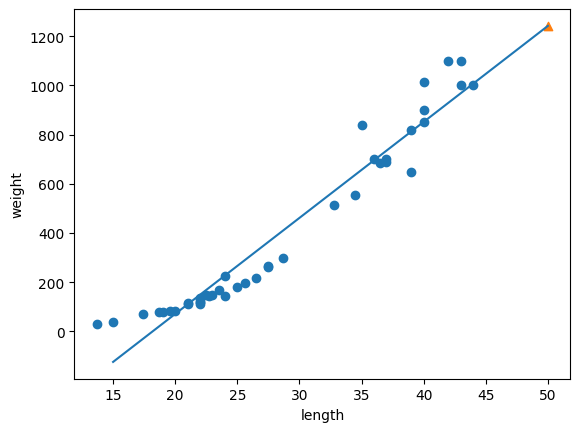

In [7]:
import matplotlib.pyplot as plt

# 그래프로 확인 해보자.

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 직선차트 x축값                 y축값[15*계수+인터셉트, 50*계수+인터셉트]
#                대방어의 무게공식 = 기울기*대방어의길이+절편

# 50cm 대방어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [8]:

# 결론 예측은 가능한데 직선이라 값이 너무 직선적이다.

print(lr.score(train_input, train_target))  # 93.98%
print(lr.score(test_input, test_target))    # 82.47%
# 훈련세트가 테스트에 비해 높지만 차이가 많이 남으로 과소적합이라고 함 (5%내외가 좋다.)
# 다항회귀(Polynomial Regression) 제곱을 활용해서 직선을 곡선으로 처리가능

0.939846333997604
0.8247503123313558


In [9]:
# 다항회귀는 2차원 방정식의 그래프로 그리려면
# 길이를 제곱한 항이 훈련세트에 추가되어야 함

# 선형회귀의 문제점은 왼쪽 하단에 있는 기준점이 불일치가 된다.
# -> 곡선으로 만들어야 함
train_poly = np.column_stack((train_input ** 2, train_input))
# 제곱한 것과 두 배열을 나란히 붙인다.
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)
# 2개의 특성이 만들어짐 (제곱값,원본값)

(42, 2) (14, 2)


In [10]:
print(train_poly)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.     22.  ]
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]]


In [11]:
lr = LinearRegression()             # 선형회귀 객체 생성
lr.fit(train_poly, train_target)    # 훈련시작!

print(lr.predict([[50**2, 50]]))    # 결과 테스트
# 테스트할 때 이 모델의대방어어 길이의 제곱과 원래 길이를 함께 넣음
# 결과 50센티의 무게는 1573.98g로 나옴
# 직선형에서는 50센티의 무게는 1241.83g으로 나옴


[1573.98423528]


In [12]:
# 대방어의 무게 기울기+절편
# (y(대방어의 무게) = a * x(대방어의 길이) + b)
print(lr.coef_, lr.intercept_) # lr.coef_ 계수, lr.intercept_ 인터셉트
# 1573.98 = 1.01         * 50**2            - 21.55 * 50 + 116.05
# 무게 = lr.coef_[0] * 대방어의길이 **2 - lr.coef_[1] * 50 + lr.intercept_

[  1.01433211 -21.55792498] 116.0502107827827


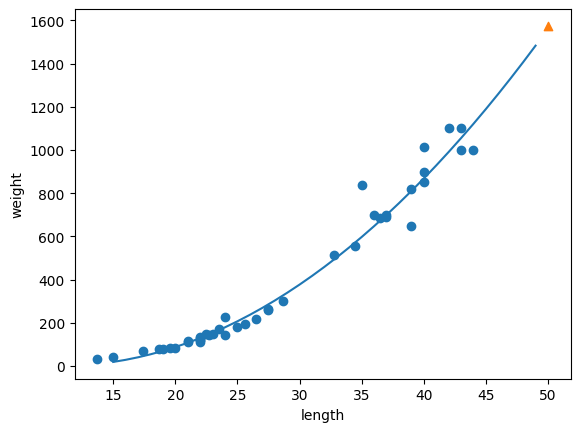

In [13]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만든다
point = np.arange(15,50)
# 훈련세트의 산점도를 그립니다.
plt.scatter(train_input,train_target)
# 15에서 49까지 2차방정식 그래프를 그립니다
plt.plot(point,1.01*point**2 -21.6*point+ 116.05) # 다향회귀 공식
# 50cm 대방어 데이터
plt.scatter([50],[1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()